<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/Modelos_de_entrenameinto--DS002-D001-%3ED006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de entreneamiento para Tesis
En este archivo creare el codigo necesario para cada modelo. Cada modelo tendra:
- Conexion con drive (para obetener el dataset)
- Generar dataset TF
- Definir estrutura del modelo
- Entrenamiento

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib

path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)

from google.colab import drive
drive.mount('/content/drive')

batch_size = 32
img_height = 180
img_width = 180

#-------------------------------------------------------------------------------

class TimingCallback(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
      self.times = []
  def on_epoch_begin(self, batch, logs={}):
      self.epoch_time_start = time()
  def on_epoch_end(self, batch, logs={}):
      self.times.append(time() - self.epoch_time_start)

# cb = TimingCallback()

#-------------------------------------------------------------------------------

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelos

### Modelo 01

In [24]:
#-------------------------------------------------------------------------------
cb_1 = TimingCallback()
num_classes = 5

model_1 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_1.summary()

epochs=10
history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_1]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 127s 84ms/step - loss: 0.9989 - accuracy: 0.6767 - val_loss: 0.6355 - val_accuracy: 0.7419
Epoch 2/10
1497/1497 [==============================] - 126s 84ms/step - loss: 0.5208 - accuracy: 0.7958 - val_loss: 0.4210 - val_accuracy: 0.8438
Epoch 3/10
1497/1497 [==============================] - 123s 82ms/step - loss: 0.3842 - accuracy: 0.8562 - val_loss: 0.4009 - val_accuracy: 0.8474
Epoch 4/10
1497/1497 [==============================] - 124s 83ms/step - loss: 0.3009 - accuracy: 0.8891 - val_loss: 0.2958 - val_accuracy: 0.8926
Epoch 5/10
1497/1497 [==============================] - 126s 84ms/step - loss: 0.2490 - accuracy: 0.9089 - val_loss: 0.3739 - val_accuracy: 0.8749
Epoch 6/10
1497/1497 [==============================] - 128s 85ms/step - loss: 0.2094 - accuracy: 0.9252 - val_loss: 0.2879 - val_accuracy: 0.9020
Epoch 7/10
1497/1497 [==============================] - 129s 86ms/step - loss: 0.1863 - accuracy: 0.9334 - val_loss: 0

[126.66816401481628, 125.77675986289978, 123.25228476524353, 124.31515169143677, 126.36372208595276, 127.64924263954163, 128.53859162330627, 128.3439962863922, 128.69005155563354, 128.5232081413269]
El entrenamiento se demoro: 1268.1211726665497 segundos
El entrenamiento se demoro: 21.135352877775826 minutos
accuracy => 0.9600434303283691
loss => 0.11711879819631577
val_accuracy => 0.921419620513916
val_loss => 0.24758101999759674


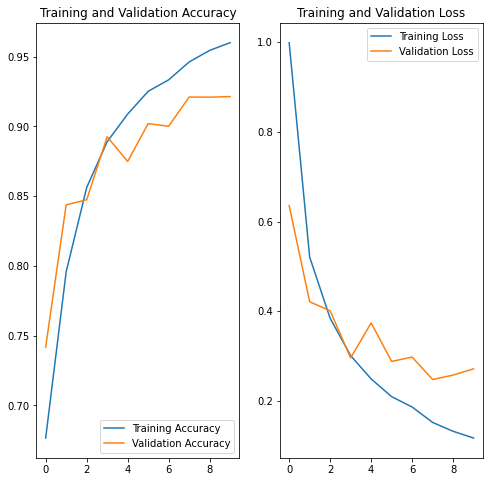

In [25]:
#-------------------------------------------------------------------------------

print(cb_1.times)
final_time = 0
for time in cb_1.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_1.history['accuracy'])))
print('loss => '+ str(min(history_1.history['loss'])))
print('val_accuracy => '+ str(max(history_1.history['val_accuracy'])))
print('val_loss => '+ str(min(history_1.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss=history_1.history['loss']
val_loss=history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo 02

In [27]:
#-------------------------------------------------------------------------------
cb_2 = TimingCallback()
num_classes = 5

model_2 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_2.summary()

epochs=10
history_2 = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_2]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 125s 83ms/step - loss: 3.5310 - accuracy: 0.6176 - val_loss: 0.7038 - val_accuracy: 0.6897
Epoch 2/10
1497/1497 [==============================] - 125s 83ms/step - loss: 0.6278 - accuracy: 0.7265 - val_loss: 0.6188 - val_accuracy: 0.7403
Epoch 3/10
1497/1497 [==============================] - 119s 79ms/step - loss: 0.5101 - accuracy: 0.7849 - val_loss: 0.5555 - val_accuracy: 0.7795
Epoch 4/10
1497/1497 [==============================] - 123s 82ms/step - loss: 0.4340 - accuracy: 0.8180 - val_loss: 0.5442 - val_accuracy: 0.7871
Epoch 5/10
1497/1497 [==============================] - 124s 83ms/step - loss: 0.3747 - accuracy: 0.8429 - val_loss: 0.6602 - val_accuracy: 0.7739
Epoch 6/10
1497/1497 [==============================] - 124s 83ms/step - loss: 0.3347 - accuracy: 0.8622 - val_loss: 0.6196 - val_accuracy: 0.7824
Epoch 7/10
1497/1497 [==============================] - 125s 83ms/step - loss: 0.3000 - accuracy: 0.8801 - val_loss: 0

[124.81596875190735, 125.26082181930542, 118.77021956443787, 123.49208664894104, 124.3237578868866, 123.92857193946838, 124.97952556610107, 124.35905456542969, 124.63157653808594, 124.3957850933075]
El entrenamiento se demoro: 1238.9573683738708 segundos
El entrenamiento se demoro: 20.64928947289785 minutos
accuracy => 0.9238027930259705
loss => 0.20294979214668274
val_accuracy => 0.8119415640830994
val_loss => 0.5441909432411194


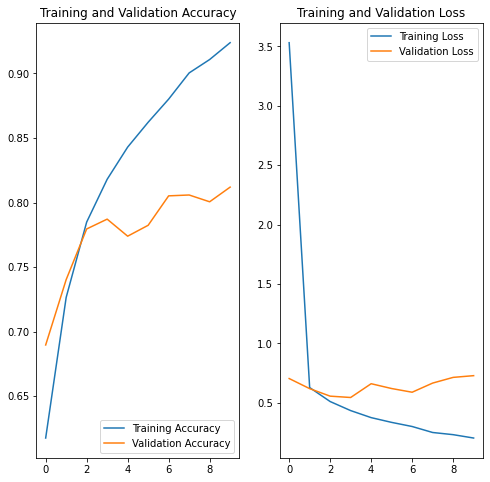

In [28]:
#-------------------------------------------------------------------------------

print(cb_2.times)
final_time = 0
for time in cb_2.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_2.history['accuracy'])))
print('loss => '+ str(min(history_2.history['loss'])))
print('val_accuracy => '+ str(max(history_2.history['val_accuracy'])))
print('val_loss => '+ str(min(history_2.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo 03

In [30]:
#-------------------------------------------------------------------------------
cb_3 = TimingCallback()
num_classes = 5

model_3 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_3.summary()

epochs=10
history_3 = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_3]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 123s 82ms/step - loss: 1.0438 - accuracy: 0.5759 - val_loss: 0.7864 - val_accuracy: 0.6555
Epoch 2/10
1497/1497 [==============================] - 124s 82ms/step - loss: 0.7108 - accuracy: 0.6846 - val_loss: 0.7118 - val_accuracy: 0.6867
Epoch 3/10
1497/1497 [==============================] - 125s 84ms/step - loss: 0.6576 - accuracy: 0.7043 - val_loss: 0.6635 - val_accuracy: 0.7106
Epoch 4/10
1497/1497 [==============================] - 125s 83ms/step - loss: 0.6305 - accuracy: 0.7178 - val_loss: 0.6450 - val_accuracy: 0.7304
Epoch 5/10
1497/1497 [==============================] - 125s 83ms/step - loss: 0.5905 - accuracy: 0.7441 - val_loss: 0.5947 - val_accuracy: 0.7560
Epoch 6/10
1497/1497 [==============================] - 125s 83ms/step - loss: 0.5452 - accuracy: 0.7698 - val_loss: 0.5631 - val_accuracy: 0.7734
Epoch 7/10
1497/1497 [==============================] - 125s 83ms/step - loss: 0.4854 - accuracy: 0.8017 - val_loss: 0

[123.13985705375671, 123.61071157455444, 125.39205479621887, 124.68153023719788, 125.14682650566101, 124.51344752311707, 124.9703459739685, 125.93387818336487, 126.63536715507507, 125.90052270889282]
El entrenamiento se demoro: 1249.9245417118073 segundos
El entrenamiento se demoro: 20.83207569519679 minutos
accuracy => 0.8537012934684753
loss => 0.36941030621528625
val_accuracy => 0.8325678706169128
val_loss => 0.4426092505455017


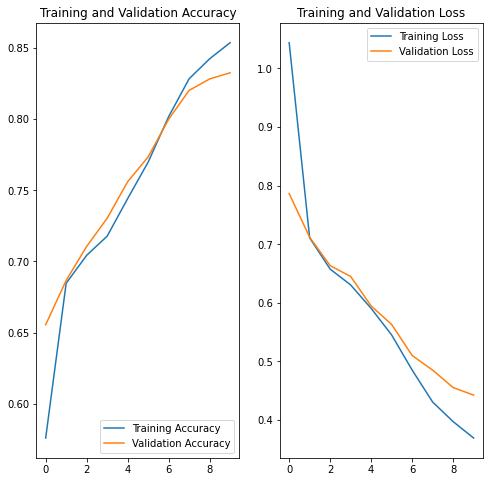

In [31]:
#-------------------------------------------------------------------------------

print(cb_3.times)
final_time = 0
for time in cb_3.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_3.history['accuracy'])))
print('loss => '+ str(min(history_3.history['loss'])))
print('val_accuracy => '+ str(max(history_3.history['val_accuracy'])))
print('val_loss => '+ str(min(history_3.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss=history_3.history['loss']
val_loss=history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo 04

In [6]:
#-------------------------------------------------------------------------------
cb_4 = TimingCallback()
num_classes = 5

model_4 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_4.summary()

epochs=15
history_4 = model_4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_4]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 119s 79ms/step - loss: 1.7000 - accuracy: 0.4445 - val_loss: 0.7704 - val_accuracy: 0.6724
Epoch 2/15
1497/1497 [==============================] - 119s 79ms/step - loss: 0.6873 - accuracy: 0.7001 - val_loss: 0.5824 - val_accuracy: 0.7522
Epoch 3/15
1497/1497 [==============================] - 121s 81ms/step - loss: 0.5369 - accuracy: 0.7727 - val_loss: 0.5166 - val_accuracy: 0.7786
Epoch 4/15
1497/1497 [==============================] - 120s 80ms/step - loss: 0.4570 - accuracy: 0.8094 - val_loss: 0.4395 - val_accuracy: 0.8304
Epoch 5/15
1497/1497 [==============================] - 122s 81ms/step - loss: 0.3534 - accuracy: 0.8634 - val_loss: 0.3401 - val_accuracy: 0.8736
Epoch 6/15
1497/1497 [==============================] - 121s 80ms/step - loss: 0.2724 - accuracy: 0.8968 - val_loss: 0.3597 - val_accuracy: 0.8753
Epoch 7/15
1497/1497 [==============================] - 121s 81ms/step - loss: 0.2258 - accuracy: 0.9139 - val_loss: 0

[119.26684975624084, 119.30926132202148, 120.94996571540833, 120.30569386482239, 121.56394600868225, 120.56714916229248, 121.38606929779053, 121.262051820755, 122.20634961128235, 122.84248518943787, 121.88305377960205, 122.97151899337769, 120.91388177871704, 121.7802243232727, 121.76176047325134]
El entrenamiento se demoro: 1818.9702610969543 segundos
El entrenamiento se demoro: 30.31617101828257 minutos
accuracy => 0.9675796627998352
loss => 0.09782318770885468
val_accuracy => 0.9068893790245056
val_loss => 0.33018016815185547


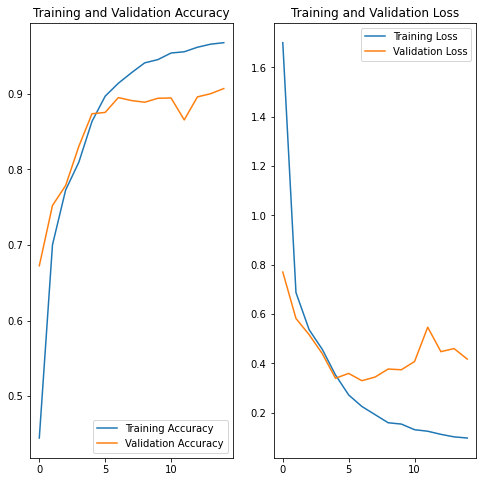

In [7]:
#-------------------------------------------------------------------------------
print(cb_4.times)
final_time = 0
for time in cb_4.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_4.history['accuracy'])))
print('loss => '+ str(min(history_4.history['loss'])))
print('val_accuracy => '+ str(max(history_4.history['val_accuracy'])))
print('val_loss => '+ str(min(history_4.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']

loss=history_4.history['loss']
val_loss=history_4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo 05

In [15]:
#-------------------------------------------------------------------------------
cb_5 = TimingCallback()
num_classes = 10

model_5 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model_5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_5.summary()

epochs=15
history_5 = model_5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_5]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 121s 81ms/step - loss: 3.2318 - accuracy: 0.6677 - val_loss: 0.6554 - val_accuracy: 0.7217
Epoch 2/15
1497/1497 [==============================] - 125s 84ms/step - loss: 0.5166 - accuracy: 0.7905 - val_loss: 0.4621 - val_accuracy: 0.8186
Epoch 3/15
1497/1497 [==============================] - 125s 83ms/step - loss: 0.3891 - accuracy: 0.8500 - val_loss: 0.3499 - val_accuracy: 0.8701
Epoch 4/15
1497/1497 [==============================] - 128s 85ms/step - loss: 0.2857 - accuracy: 0.8926 - val_loss: 0.2953 - val_accuracy: 0.8950
Epoch 5/15
1497/1497 [==============================] - 126s 84ms/step - loss: 0.2200 - accuracy: 0.9172 - val_loss: 0.2757 - val_accuracy: 0.9076
Epoch 6/15
1497/1497 [==============================] - 126s 84ms/step - loss: 0.1850 - accuracy: 0.9320 - val_loss: 0.3271 - val_accuracy: 0.8972
Epoch 7/15
1497/1497 [==============================] - 125s 83ms/step - loss: 0.1515 - accuracy: 0.9460 - val_loss: 0

[121.37593388557434, 125.48331356048584, 125.07263517379761, 127.71474170684814, 126.34047865867615, 126.21666812896729, 124.85298275947571, 125.35004377365112, 121.05860829353333, 123.3898913860321, 123.93636703491211, 125.25628900527954, 126.99284887313843, 127.46158933639526, 127.48423886299133]
El entrenamiento se demoro: 1877.9866304397583 segundos
El entrenamiento se demoro: 31.29977717399597 minutos
accuracy => 0.9812742471694946
loss => 0.06318143755197525
val_accuracy => 0.930855929851532
val_loss => 0.27573075890541077


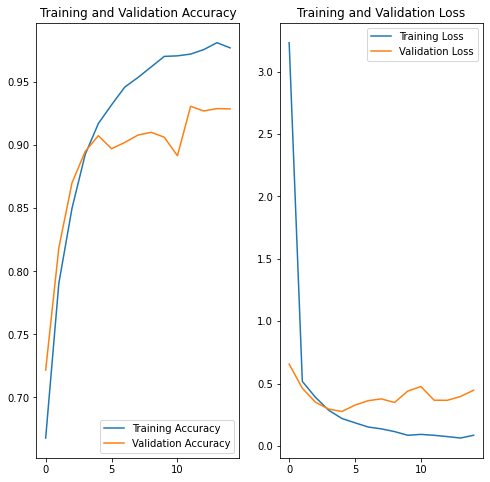

In [16]:
#-------------------------------------------------------------------------------

print(cb_5.times)
final_time = 0
for time in cb_5.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_5.history['accuracy'])))
print('loss => '+ str(min(history_5.history['loss'])))
print('val_accuracy => '+ str(max(history_5.history['val_accuracy'])))
print('val_loss => '+ str(min(history_5.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']

loss=history_5.history['loss']
val_loss=history_5.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo 06

In [20]:
#-------------------------------------------------------------------------------
cb_6 = TimingCallback()
num_classes = 5

model_6 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_6.summary()

epochs=10
history_6 = model_6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_6]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 117s 78ms/step - loss: 6.9612 - accuracy: 0.4293 - val_loss: 1.2411 - val_accuracy: 0.5466
Epoch 2/10
1497/1497 [==============================] - 123s 82ms/step - loss: 1.2523 - accuracy: 0.5232 - val_loss: 1.2294 - val_accuracy: 0.5019
Epoch 3/10
1497/1497 [==============================] - 123s 82ms/step - loss: 1.0984 - accuracy: 0.5783 - val_loss: 1.0328 - val_accuracy: 0.6002
Epoch 4/10
1497/1497 [==============================] - 124s 83ms/step - loss: 0.9763 - accuracy: 0.6319 - val_loss: 0.9594 - val_accuracy: 0.6467
Epoch 5/10
1497/1497 [==============================] - 123s 82ms/step - loss: 0.8750 - accuracy: 0.6700 - val_loss: 0.8629 - val_accuracy: 0.6615
Epoch 6/10
1497/1497 [==============================] - 124s 83ms/step - loss: 0.7312 - accuracy: 0.7251 - val_loss: 0.6339 - val_accuracy: 0.7501
Epoch 7/10
1497/1497 [==============================] - 125s 83ms/step - loss: 0.5243 - accuracy: 0.8104 - val_loss: 0

[117.21141481399536, 123.06244659423828, 122.87572598457336, 123.96829891204834, 122.94212436676025, 124.2127480506897, 124.55762577056885, 125.93869304656982, 127.59304094314575, 128.68319439888]
El entrenamiento se demoro: 1241.0453128814697 segundos
El entrenamiento se demoro: 20.684088548024494 minutos
accuracy => 0.9106926918029785
loss => 0.2672399878501892
val_accuracy => 0.8687264919281006
val_loss => 0.44810551404953003


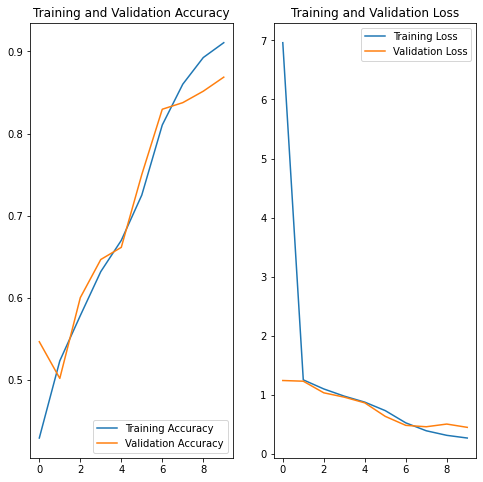

In [21]:
#-------------------------------------------------------------------------------

print(cb_6.times)
final_time = 0
for time in cb_6.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_6.history['accuracy'])))
print('loss => '+ str(min(history_6.history['loss'])))
print('val_accuracy => '+ str(max(history_6.history['val_accuracy'])))
print('val_loss => '+ str(min(history_6.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_6.history['accuracy']
val_acc = history_6.history['val_accuracy']

loss=history_6.history['loss']
val_loss=history_6.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Recopilacion de pruebas e informacion del proceso de entrenamiento


In [ ]:
#-------------------------------------------------------------------------------

print(cb.times)
final_time = 0
for time in cb.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history.history['accuracy'])))
print('loss => '+ str(min(history.history['loss'])))
print('val_accuracy => '+ str(max(history.history['val_accuracy'])))
print('val_loss => '+ str(min(history.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()